In [13]:
# allow for imports from ../src directory

from os import path as os_path
from os import getcwd
from sys import path as sys_path

sys_path.append(os_path.dirname(getcwd()))  

In [14]:
import pandas as pd
import numpy as np
# from src.helper_functions import read_render_markdown_file
from scipy.constants import Boltzmann

In [15]:
z = [0, 1, 2, 3, 4, 5]

print(z[1:-1])

[1, 2, 3, 4]


In [16]:
UR_PATH = "/Users/mjboothaus/code/github/mjboothaus/PhD-Thesis/src/pyoz/nrcg-ur.dat"
ur = pd.read_csv(UR_PATH, header=None, delim_whitespace=True)
ur.set_index(0, inplace=True)
#ur = ur / (Boltzmann * 1075)

<AxesSubplot:xlabel='0'>

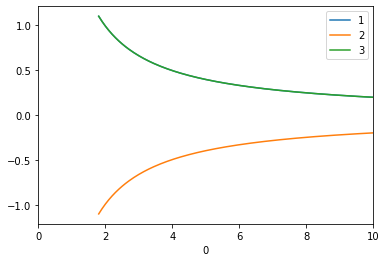

In [17]:

ur.plot(xlim=[0, 10])  # , ylim=[-100, 200])

In [18]:
CR_PATH = "/Users/mjboothaus/code/github/mjboothaus/PhD-Thesis/src/pyoz/nrcg-cr.dat"
cr = pd.read_csv(CR_PATH, header=None, delim_whitespace=True)
cr.set_index(0, inplace=True)

<AxesSubplot:xlabel='0'>

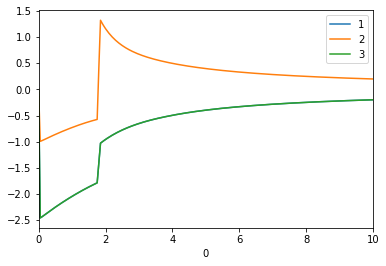

In [19]:
cr.plot(xlim=[0, 10])

In [22]:
from src.pyoz.pyoz_potential import def_potential

In [23]:
ctrl = {'npoints_exp': 12, 'npoints': 4095, 'deltar': 0.05, 'max_r': 204.75, 'deltak': 0.015343553863686413, 'max_k': 62.83185307179586, 'mix_param': 1.0, 'convergence_crit': 1e-09,
        'max_dsqn': 100.0, 'max_iter': 500, 'do_nr': True, 'nr_mix_param': 0.0, 'nr_convergence_factor': 0.001, 'nr_max_iter': 10, 'nr_noconv_incr': False, 'do_graphics': False}


In [24]:
# syst = {'temp': 300.0, 'epsilon_r': 78.3, 'ncomponents': 2, 'closure_name': 'hnc', 'closure': <function closure_hnc at 0x105e8c550>, 'name': ['P', 'M'], 'conc_mol': np.array([0.5, 0.5]), 'dens': {'num': np.array([0.00030111, 0.00030111]), 'totnum': 0.0006022141500000001, 'ij': np.array([[0.00030111, 0.00030111],
#       [0.00030111, 0.00030111]]), 'inf_dilution': np.array([[0, 0],
#       [0, 0]], dtype=int8), 'xi': np.array([0.5, 0.5])}, 'inf_dilute': False, 'ncomb': 3.0}

In [25]:
parm = [{'pot_type': 'hs', 'pot_title': 'hs', 'hs_diameter': np.array([4., 6.]), 'hs_ij': np.array([[4., 5.],
       [5., 6.]]), 'dis_index': np.array([[ 79,  99],
       [ 99, 119]], dtype=np.int32)}, {'pot_type': 'coulomb', 'pot_title': 'coulomb', 'charge': np.array([ 1., -1.]), 'chg_ij': np.array([[ 7.11369718, -7.11369718],
       [-7.11369718,  7.11369718]]), 'erf_alpha': np.array([[0.05800536, 0.05800536],
       [0.05800536, 0.05800536]])}]

In [26]:
# const = <pyoz_const.const object at 0x1121d5c10>
# dft = <pyoz_dft.dft object at 0x1049aed60>

In [27]:
# k = [1.53435539e-02 3.06871077e-02 4.60306616e-02 ... 6.28011660e+01
# 6.28165095e+01 6.28318531e+01]

In [28]:
# def_potential(ctrl, syst, parm, const, dft, r, k)

Example of running (so-far untested) pyOZ code e.g. for charged hard-spheres HNC closure
`python pyoz.py -i tests/hs_chg/nrcg.in`

In [29]:
!cat ../pyOZ_bulk_fluid/pyoz-0.3/tests/hs_chg/nrcg.in

cat: ../pyOZ_bulk_fluid/pyoz-0.3/tests/hs_chg/nrcg.in: No such file or directory


In [39]:
CR_PATH = "../src/pyoz/tests/hs_chg/picard-cr.dat.orig"
GR_PATH = "../src/pyoz/tests/hs_chg/pyoz-gr.dat"

In [40]:
!head $CR_PATH

   0.000   0.00000   0.00000   0.00000
   0.050  -2.14950  -0.42411  -2.33814
   0.100  -2.14493  -0.42415  -2.33303
   0.150  -2.13966  -0.42421  -2.32712
   0.200  -2.13430  -0.42430  -2.32110
   0.250  -2.12892  -0.42441  -2.31505
   0.300  -2.12355  -0.42455  -2.30901
   0.350  -2.11821  -0.42471  -2.30299
   0.400  -2.11291  -0.42490  -2.29700
   0.450  -2.10764  -0.42512  -2.29104


In [41]:
cr = pd.read_csv(CR_PATH, header=None, delim_whitespace=True)

In [42]:
cr.head()

,0,1,2,3
0,0.00,0.00000,0.00000,0.00000
1,0.05,-2.14950,-0.42411,-2.33814
2,0.10,-2.14493,-0.42415,-2.33303
3,0.15,-2.13966,-0.42421,-2.32712
4,0.20,-2.13430,-0.42430,-2.32110


In [43]:
cr.set_index(0, inplace=True)

<AxesSubplot:xlabel='0'>

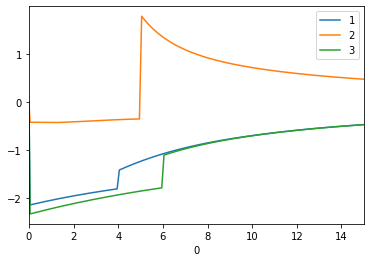

In [44]:
cr.plot(xlim=[0, 15])

In [46]:
cr["rcr"] = cr.apply(lambda r: r*row)

NameError: name 'row' is not defined

In [ ]:
gr = pd.read_csv(GR_PATH, header=None, delim_whitespace=True)

In [ ]:
gr.set_index(0, inplace=True)

In [ ]:
from matplotlib.pyplot import xlim


gr.plot(xlim=[0, 15])